In [1]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [41]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [42]:
errors_approximation=pd.read_csv('../../data/'+ 'all_errors_nguyen' + '.csv',index_col=0)

#only take rmse results
columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test","r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)

,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,r
0,0.00,1,0.006691,0.990376,2.103031e-16,1.130134e-15,0
1,0.00,1,0.004360,0.933159,2.134518e-16,1.016382e-15,1
2,0.00,1,0.006433,1.107403,2.059831e-16,1.128055e-15,2
3,0.02,1,0.015444,1.092758,6.415863e-03,2.715548e-01,0
4,0.02,1,0.004658,0.971435,2.392921e-03,1.797497e-02,1
...,...,...,...,...,...,...,...
160,0.18,10,0.016964,0.015235,4.195916e-02,5.652054e-02,1
161,0.18,10,0.034009,0.051130,3.753406e-02,5.535585e-02,2
162,0.20,10,0.066284,0.325455,4.690686e-02,1.310190e-01,0
163,0.20,10,0.106463,0.164086,1.036397e-01,6.699369e-02,1


In [43]:
#Melt dataframes and divide train and test
errors_train=errors_approximation[["sigma", "function","rmse_nn_train", "rmse_mdl_train","r"]]
errors_train=pd.melt(errors_train,id_vars=["sigma","function","r"], var_name="error_train",value_name= "value_train")

errors_test=errors_approximation[["sigma", "function","rmse_nn_test", "rmse_mdl_test","r"]]
errors_test=pd.melt(errors_test,id_vars=["sigma","function", "r"], var_name="error_test", value_name= "value_test")

display(errors_train)
display(errors_test)

,sigma,function,r,error_train,value_train
0,0.00,1,0,rmse_nn_train,0.006691
1,0.00,1,1,rmse_nn_train,0.004360
2,0.00,1,2,rmse_nn_train,0.006433
3,0.02,1,0,rmse_nn_train,0.015444
4,0.02,1,1,rmse_nn_train,0.004658
...,...,...,...,...,...
325,0.18,10,1,rmse_mdl_train,0.041959
326,0.18,10,2,rmse_mdl_train,0.037534
327,0.20,10,0,rmse_mdl_train,0.046907
328,0.20,10,1,rmse_mdl_train,0.103640


,sigma,function,r,error_test,value_test
0,0.00,1,0,rmse_nn_test,0.990376
1,0.00,1,1,rmse_nn_test,0.933159
2,0.00,1,2,rmse_nn_test,1.107403
3,0.02,1,0,rmse_nn_test,1.092758
4,0.02,1,1,rmse_nn_test,0.971435
...,...,...,...,...,...
325,0.18,10,1,rmse_mdl_test,0.056521
326,0.18,10,2,rmse_mdl_test,0.055356
327,0.20,10,0,rmse_mdl_test,0.131019
328,0.20,10,1,rmse_mdl_test,0.066994


In [44]:
#Select function to plot
func_number=8 #1,5,7,8,10

errors_train_plot=errors_train[errors_train['function']==func_number]
errors_test_plot=errors_test[errors_test['function']==func_number]

titles={1: r'$y_1=3.39 x^3 + 2.12 x^2 +1.78x$',
        5: r'$y_5=\sin(x^2) \cos(x)$', 
        7: r'$y_7=\log(x+1.4) + \log(x^2 + 1.3)$',
        8: r'$y_8=\sqrt{1.23x}$',
        10:r'$y_{10}=\sin(1.5x) \cos(0.5y)$' }

In [45]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 16*cm; height=16*cm

#color_data=sns.color_palette("colorblind")[0]
#color_noise=sns.color_palette("colorblind")[7]
#color_ann=sns.color_palette("colorblind")[4]
#color_bms=sns.color_palette("colorblind")[2]

colors={'4e-3x':['#fee0d2', '#deebf7'],
       '2x':['#fc9272', '#9ecae1'],
       '1x':['#de2d26', '#3182bd'] }

color_ann='#de2d26' 
color_bms='#3182bd'

#Fonts and sizes                                                                                    
size_axis=16;size_ticks=14
line_w=1;marker_s=3 #width and marker size                                                          
m_size=10
markers = {'rmse_nn_train': 'o', 'rmse_mdl_train': 's'}

output_path='../../results/'

resamples=100000; bs_seed=1111 # bootstrap and seed

ymin=1e-17;ymax=10

6.299212598425196 6.299212598425196
6.299212598425196 6.299212598425196


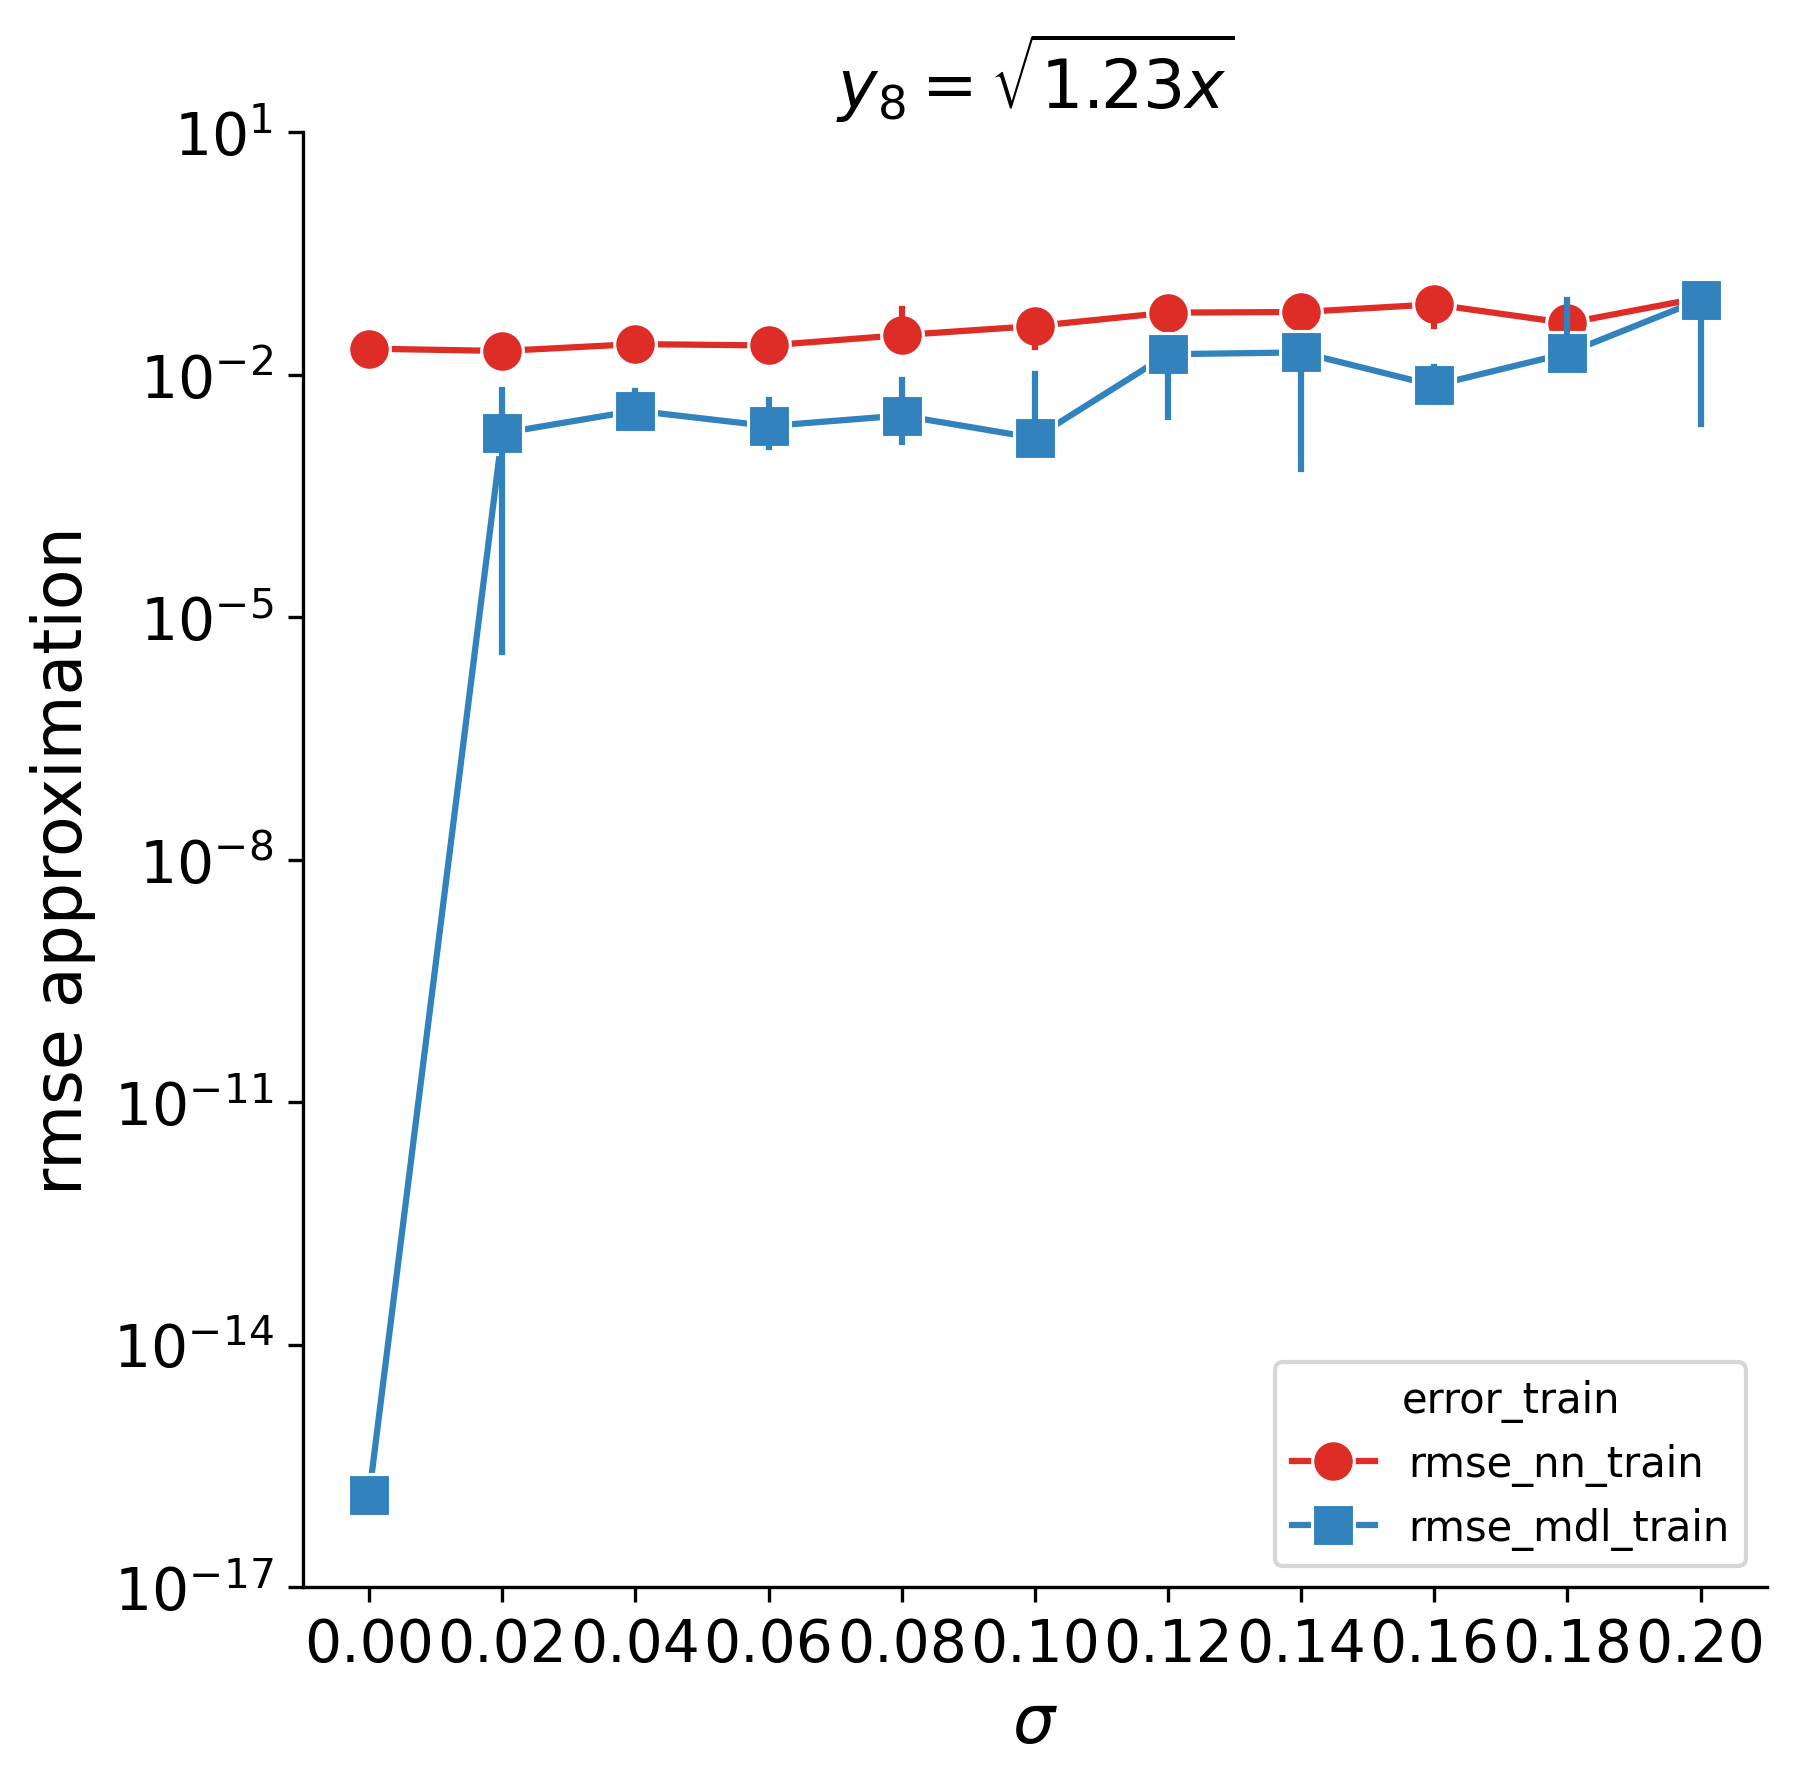

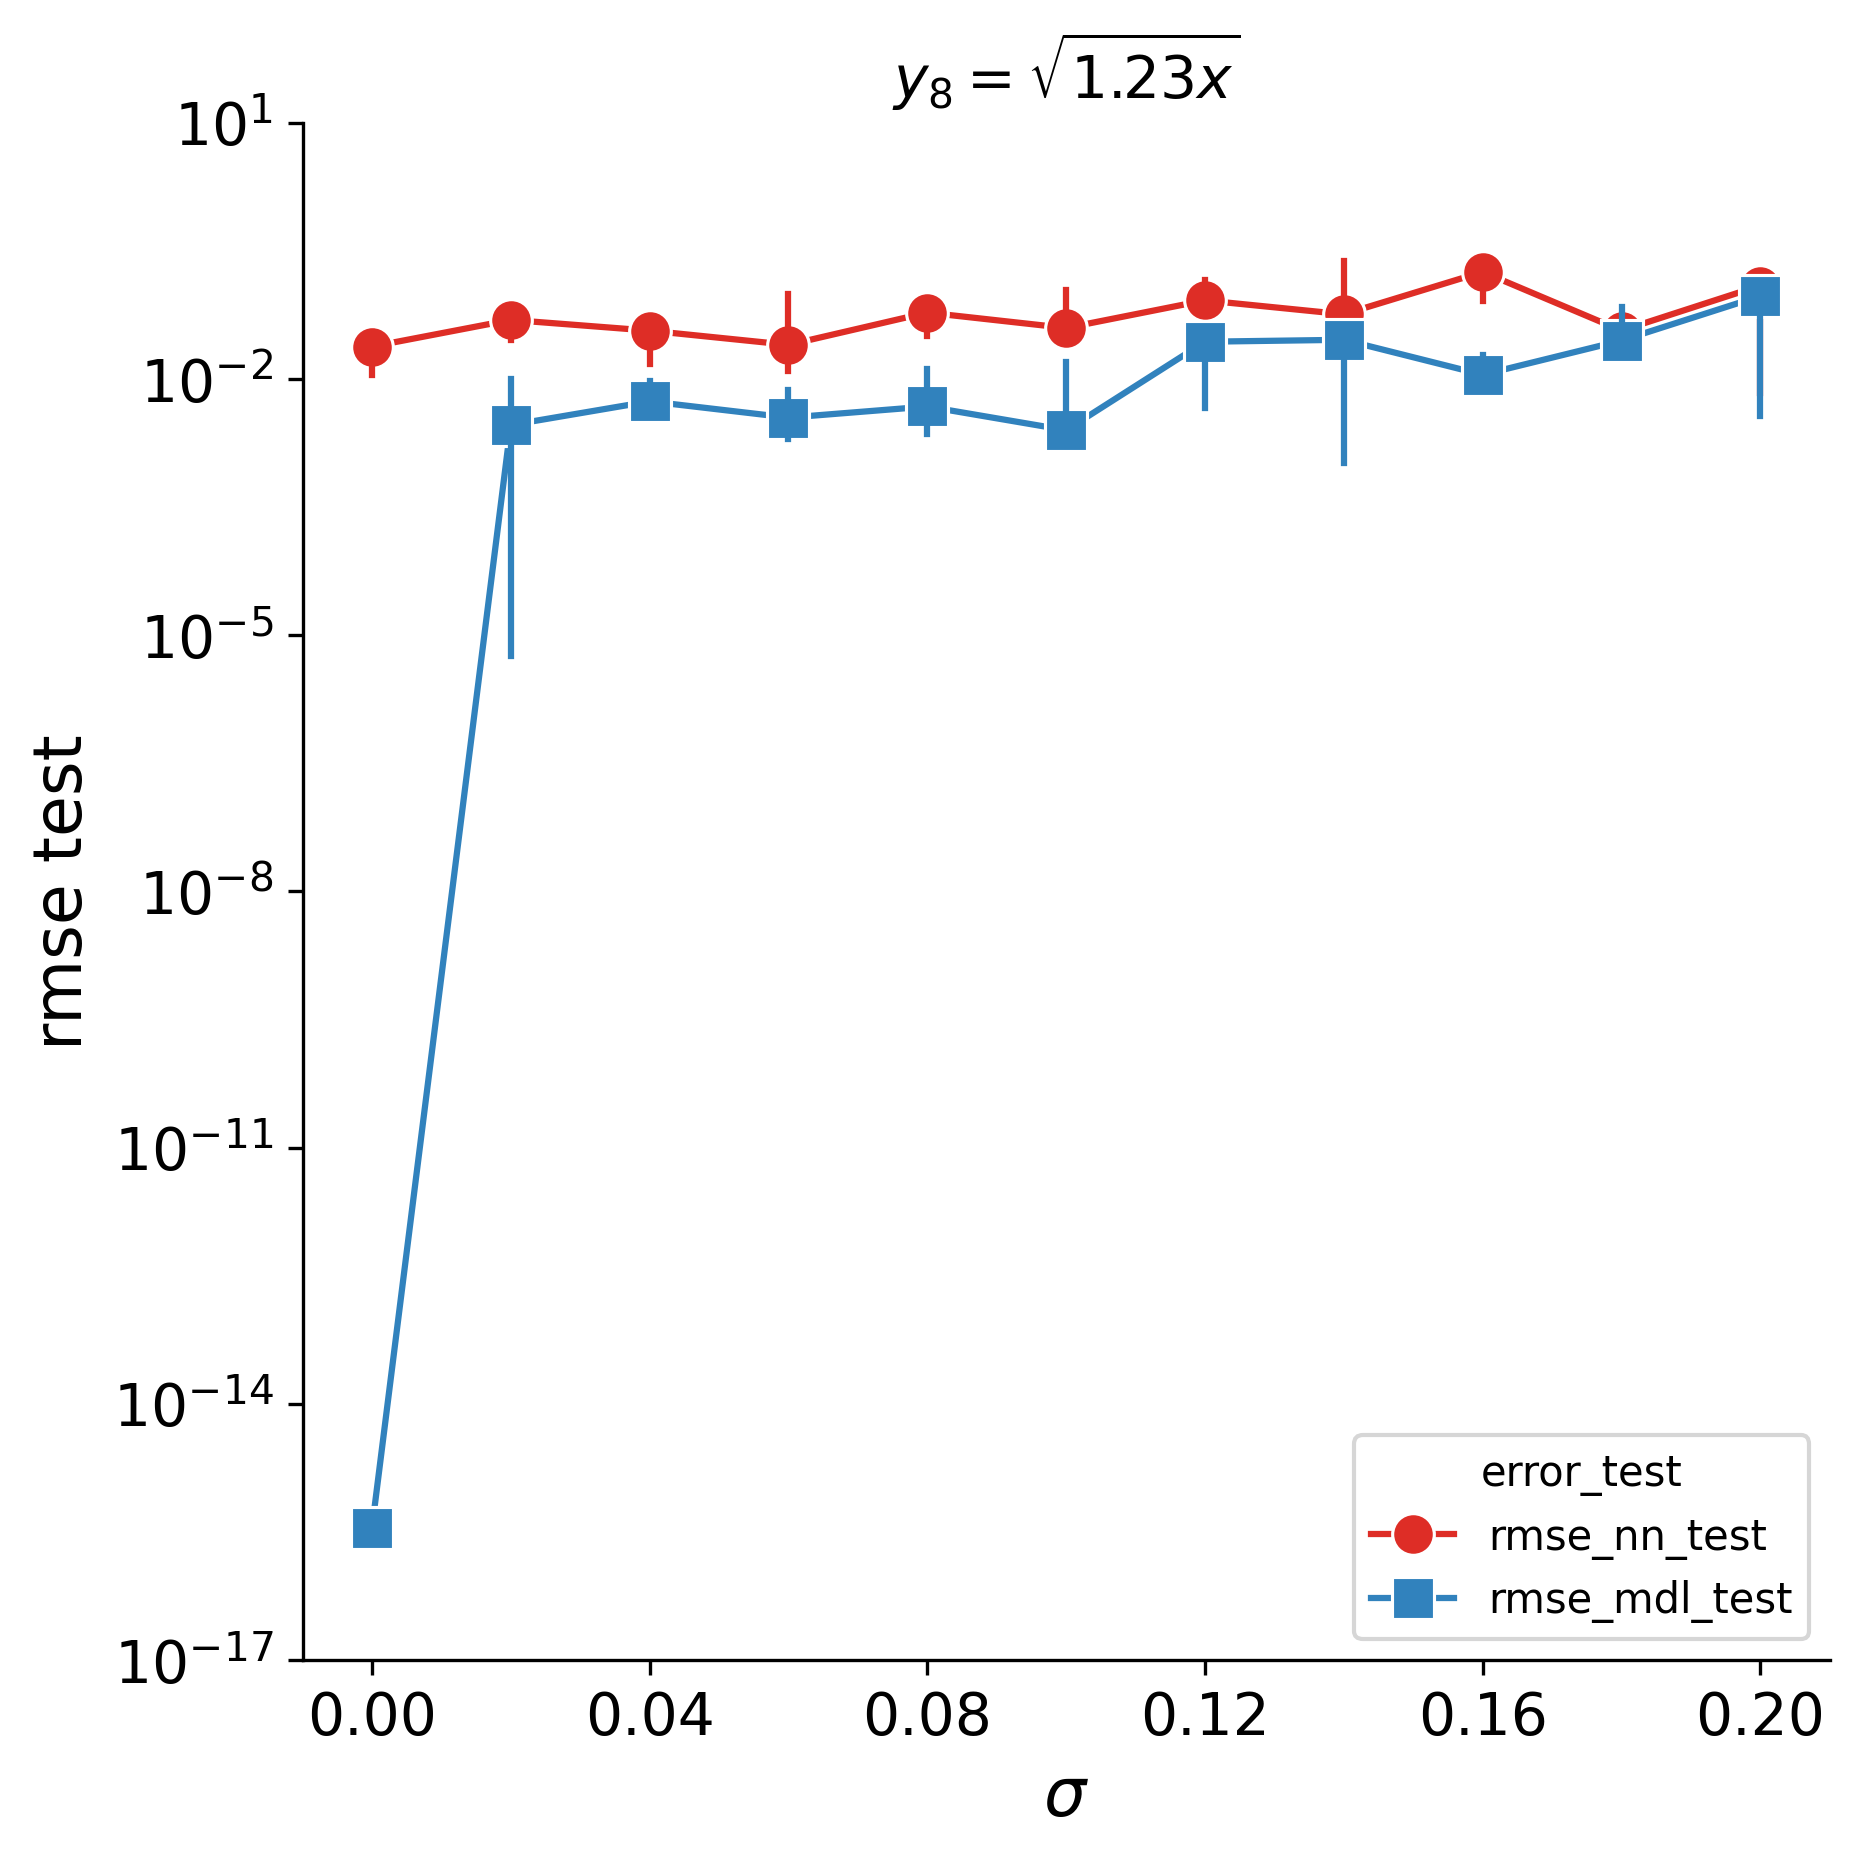

In [46]:
#New plot 

#approximation
#-------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_train_plot, x='sigma', y='value_train', hue='error_train', style='error_train',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])

#labels, limits, and ticks
plt.title(titles[func_number],fontsize=size_axis)
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse approximation',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
xtick_labels=np.arange(0.0,0.22,0.02)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
#plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
#-------------------------------------------------------------------------------------------------------------------

#test
#-------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
print(width, height)

sns.lineplot(
        data=errors_test_plot, x='sigma', y='value_test', hue='error_test', style='error_test',
        estimator='median', err_style="bars", errorbar=('ci', 95), n_boot=resamples, seed=bs_seed,
        markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], dashes=False, markersize=m_size, legend="full", 
        palette=[color_ann, color_bms])

#labels, limits, and ticks
plt.title(titles[func_number],fontsize=size_ticks)
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
#xtick_labels=np.arange(0.0,0.22,0.02)
xtick_labels=np.arange(0.0,0.22,0.04)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.minorticks_off()
plt.ylim(ymin,ymax)

sns.despine()
plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
#-------------------------------------------------------------------------------------------------------------------





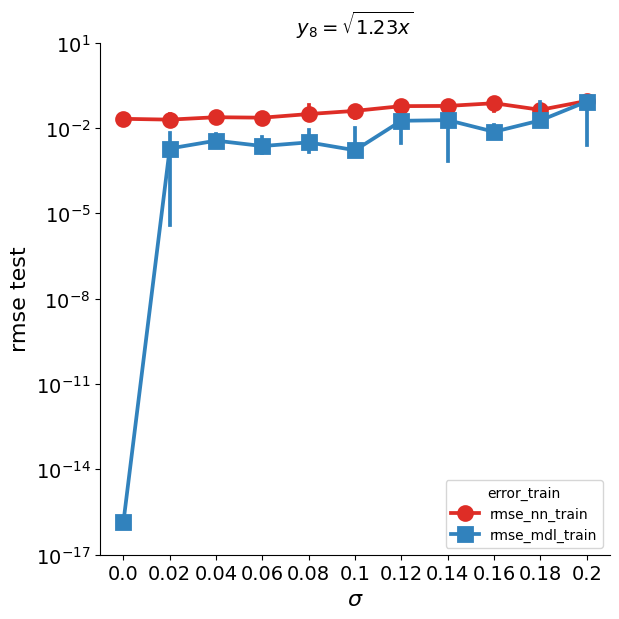

<Figure size 1889.76x1889.76 with 0 Axes>

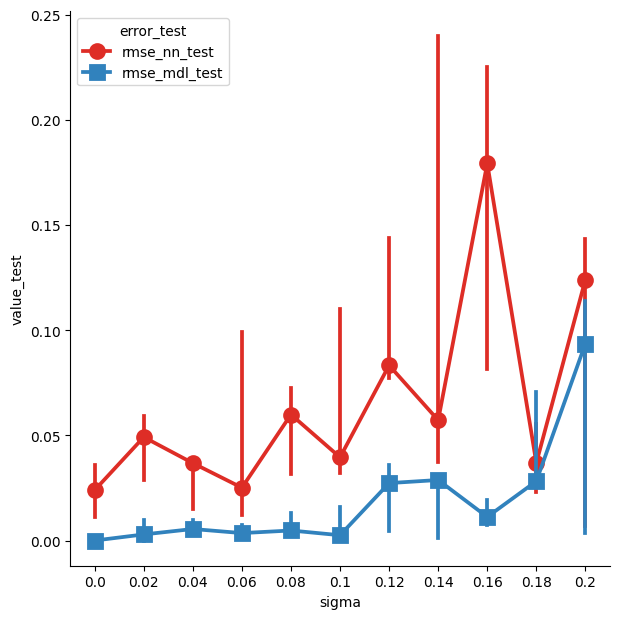

In [47]:
#Plot nguyen train (old version)
#-------------------------------------------------------------------------------------------------------------------
subplot_height = height
subplot_aspect = (width) / (height)


g = sns.catplot(data=errors_train_plot, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
                errorbar=('ci', 95), markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
                seed=bs_seed, palette=[color_ann, color_bms], legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse approximation', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

g.ax.set_title(titles[func_number],fontsize=size_ticks)

sns.despine()
plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_train_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
#-------------------------------------------------------------------------------------------------------------------


#Plot nguyen test
#-------------------------------------------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_plot, x='sigma', y='value_test', hue='error_test', kind='point', estimator='median',
            errorbar=('ci', 95),markers=[markers['rmse_nn_train'], markers['rmse_mdl_train']], markersize=m_size, n_boot=resamples, 
            seed=bs_seed, palette=[color_ann, color_bms],legend_out=False, height=subplot_height, aspect=subplot_aspect)

# labels, limits, and ticks
# Access the axes from the FacetGrid object 'g'
g.set_axis_labels(x_var=r'$\sigma$', y_var='rmse test', fontsize=size_axis)
g.ax.set_yscale("log") # Apply to the single axes object
g.ax.tick_params(axis='x', labelsize=size_ticks) # Apply to x-axis ticks
g.ax.tick_params(axis='y', labelsize=size_ticks) # Apply to y-axis ticks
g.ax.minorticks_off() # Apply to the axes
g.ax.set_ylim(ymin, ymax) # Apply to the axes

g.ax.set_title(titles[func_number],fontsize=size_ticks)

sns.despine()
plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_test_old'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
#plt.savefig(output_path+name_fig + '.png',dpi=300)
#-------------------------------------------------------------------------------------------------------------------


(1e-17, 10)

<Figure size 1889.76x1889.76 with 0 Axes>

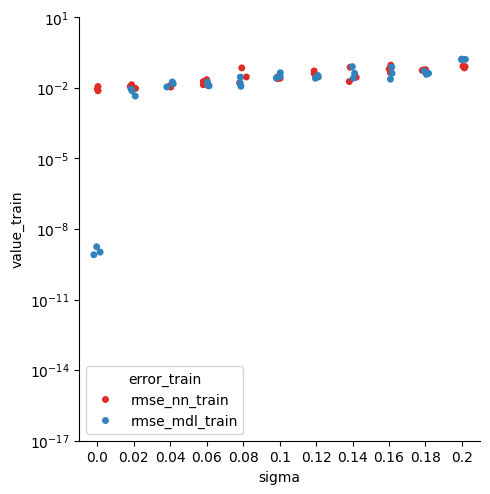

<Figure size 1889.76x1889.76 with 0 Axes>

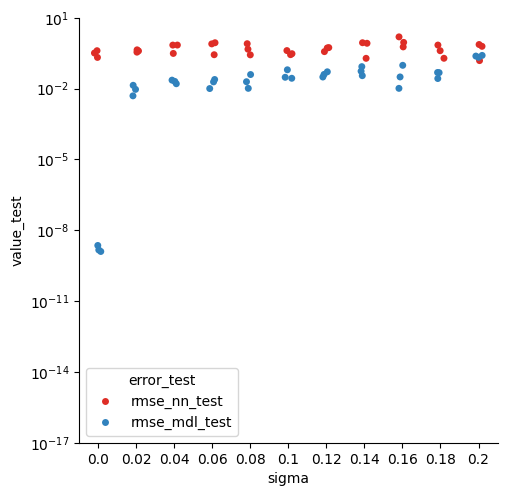

In [24]:
#Plot results of individual simulations
#train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_plot, x='sigma', y='value_train', hue='error_train',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

#test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_plot, x='sigma', y='value_test', hue='error_test',palette=[color_ann, color_bms],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)